In [10]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

In [11]:
x=pd.read_csv("./fashion-mnist_train.csv")
X_=np.array(x)
X=X_[:,1:]
Y=X_[:,0]
X=X/255.0
print(X.shape)
print(Y.shape)

(60000, 784)
(60000,)


In [12]:
np.unique(Y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [13]:
X_train=X.reshape((-1,28,28,1))
Y_train=np_utils.to_categorical(Y)
print(X_train.shape,Y_train.shape)

(60000, 28, 28, 1) (60000, 10)


In [14]:
from matplotlib import pyplot as plt

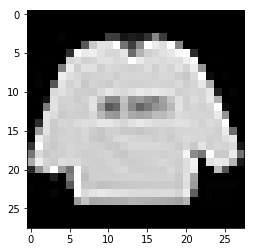

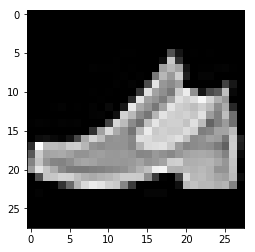

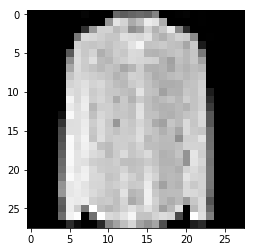

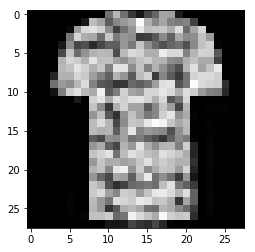

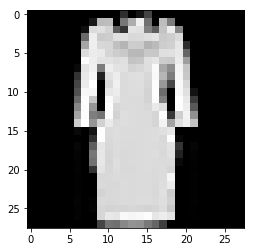

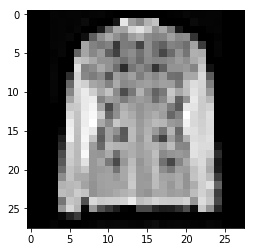

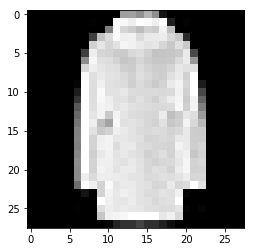

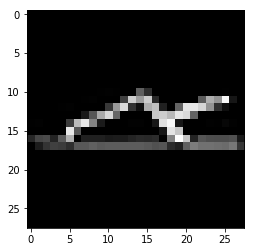

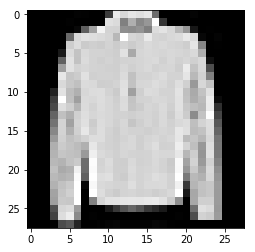

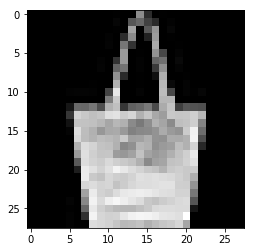

In [15]:
for i in range(10):
    plt.imshow(X_train[i].reshape(28,28),cmap='gray')
    plt.show()

# CNN Model


In [16]:
model=Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
__________

In [17]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [18]:
hist=model.fit(X_train,Y_train,epochs=20,shuffle=True,batch_size=256,validation_split=0.20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 72s 2ms/step - loss: 0.8078 - acc: 0.7020 - val_loss: 0.5909 - val_acc: 0.7912
Epoch 2/20
48000/48000 [==============================] - 72s 2ms/step - loss: 0.4793 - acc: 0.8264 - val_loss: 0.4599 - val_acc: 0.8534
Epoch 3/20
48000/48000 [==============================] - 72s 2ms/step - loss: 0.4075 - acc: 0.8536 - val_loss: 0.4038 - val_acc: 0.8651
Epoch 4/20
48000/48000 [==============================] - 72s 2ms/step - loss: 0.3680 - acc: 0.8689 - val_loss: 0.3929 - val_acc: 0.8654
Epoch 5/20
48000/48000 [==============================] - 72s 2ms/step - loss: 0.3357 - acc: 0.8798 - val_loss: 0.3677 - val_acc: 0.8757
Epoch 6/20
48000/48000 [==============================] - 73s 2ms/step - loss: 0.3128 - acc: 0.8866 - val_loss: 0.3318 - val_acc: 0.8868
Epoch 7/20
48000/48000 [==============================] - 74s 2ms/step - loss: 0.2948 - acc: 0.8935 - val_loss: 0.3185 - val_acc

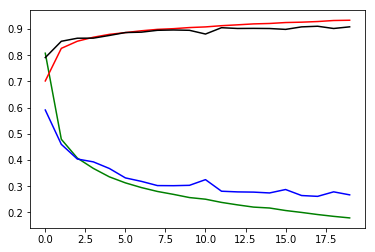

In [19]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')

plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'black')
plt.show()

In [20]:
x_test=pd.read_csv("./fashion-mnist_test.csv")
print(x_test.shape)

(10000, 785)


In [51]:
x_test=np.array(x_test)
X1=x_test[:,1:]
Y1=x_test[:,0]
print(X1.shape)
print(Y1.shape)

(10000, 784)
(10000,)


In [52]:
np.unique(Y1,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [54]:
X_test=X1.reshape((-1,28,28,1))
Y_test=np_utils.to_categorical(Y1)
print(X_test.shape)
print(Y_test.shape)

(10000, 28, 28, 1)
(10000, 10)


In [55]:
labelNames = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]

In [56]:
preds=model.predict(X_test)


In [57]:
from sklearn.metrics import classification_report

In [58]:
 
# show a nicely formatted classification report
print("[INFO] evaluating network...")
print(classification_report(Y_test.argmax(axis=1), preds.argmax(axis=1),
	target_names=labelNames))

[INFO] evaluating network...
              precision    recall  f1-score   support

         top       0.79      0.48      0.60      1000
     trouser       0.90      0.97      0.93      1000
    pullover       0.83      0.69      0.75      1000
       dress       0.78      0.79      0.79      1000
        coat       0.67      0.91      0.77      1000
      sandal       0.66      0.82      0.73      1000
       shirt       0.52      0.75      0.62      1000
     sneaker       0.87      0.36      0.51      1000
         bag       0.85      0.93      0.89      1000
  ankle boot       0.95      0.88      0.92      1000

   micro avg       0.76      0.76      0.76     10000
   macro avg       0.78      0.76      0.75     10000
weighted avg       0.78      0.76      0.75     10000



In [59]:
from keras import backend as K
import numpy as np

In [63]:
import cv2
from imutils import build_montages

In [64]:
# initialize our list of output images
images = []
 
# randomly select a few testing fashion items
for i in np.random.choice(np.arange(0, len(Y_test)), size=(16,)):
	# classify the clothing
	probs = model.predict(X_test[np.newaxis, i])
	prediction = probs.argmax(axis=1)
	label = labelNames[prediction[0]]
 
	# extract the image from the testData if using "channels_first"
	# ordering
	if K.image_data_format() == "channels_first":
		image = (X_test[i][0] * 255).astype("uint8")
 
	# otherwise we are using "channels_last" ordering
	else:
		image = (X_test[i] * 255).astype("uint8")
# initialize the text label color as green (correct)
	color = (0, 255, 0)
 
	# otherwise, the class label prediction is incorrect
	if prediction[0] != np.argmax(Y_test[i]):
		color = (0, 0, 255)
 
	# merge the channels into one image and resize the image from
	# 28x28 to 96x96 so we can better see it and then draw the
	# predicted label on the image
	image = cv2.merge([image] * 3)
	image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
	cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75,
		color, 2)
 
	# add the image to our list of output images
	images.append(image)
 
# construct the montage for the images
montage = build_montages(images, (96, 96), (4, 4))[0]
 
# show the output montage
cv2.imshow("Fashion MNIST", montage)
cv2.waitKey(0)

97